In [ ]:
import tensorflow.keras as tk

In [2]:
data = tk.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

60000 examples, each example is 28*28 array

In [3]:
train_images.shape

(60000, 28, 28)

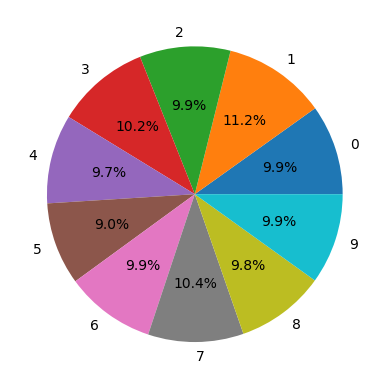

In [4]:
import matplotlib.pyplot as plt
import numpy as np

unique_values, value_counts = np.unique(train_labels, return_counts = True)

plt.pie(value_counts, labels = unique_values, autopct = "%1.1f%%")
plt.show()

Find first n examples that represent label number

In [5]:
label = 4
images = []
n_examples = 25

for i in range(len(train_labels)):
  if train_labels[i] == label:
    images.append(train_images[i])

    if len(images) == n_examples:
      break

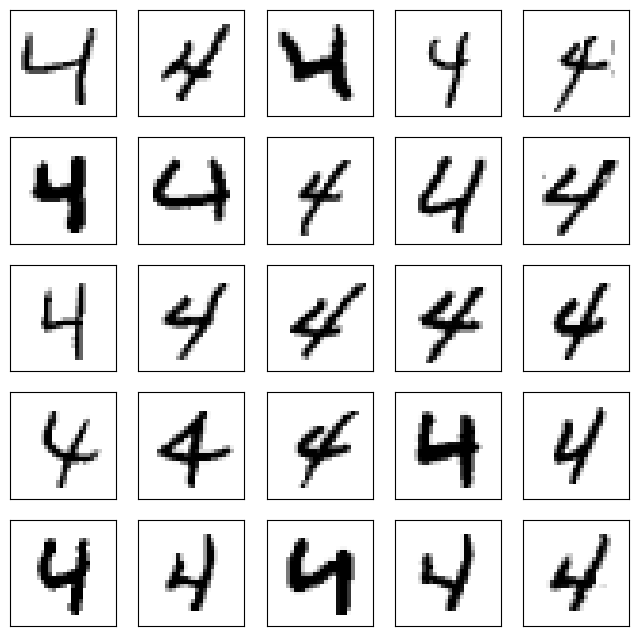

In [6]:
plt.figure(figsize = (8, 8))

for i in range(n_examples):
  plt.subplot(5, 5, i + 1)

  plt.xticks([])
  plt.yticks([])

  plt.imshow(images[i], cmap = plt.cm.binary)

plt.show()

Scale examples

In [7]:
train_images = train_images / 255
test_images = test_images / 255

Flat 28*28 array into 784 1-D list

In [ ]:
model = tk.Sequential([
  tk.layers.Flatten(input_shape = (28, 28)),
  tk.layers.Dense(units = 512, activation = "relu"),
  tk.layers.Dense(units = 256, activation = "relu"),
  tk.layers.Dense(units = 128, activation = "relu"),
  # softmax will return a list of available classes with their probabilities
  tk.layers.Dense(units = 10, activation = "softmax")
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [10]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0859 - accuracy: 0.9738
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0602 - accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0479 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0389 - accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0336 - accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0264 - accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0250 - accuracy: 0.9925
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0215 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0211 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [11]:
loss, accuracy = model.evaluate(test_images, test_labels)

loss, accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0907 - accuracy: 0.9785


(0.09066678583621979, 0.9785000085830688)

313/313 [==============================] - 1s 3ms/step


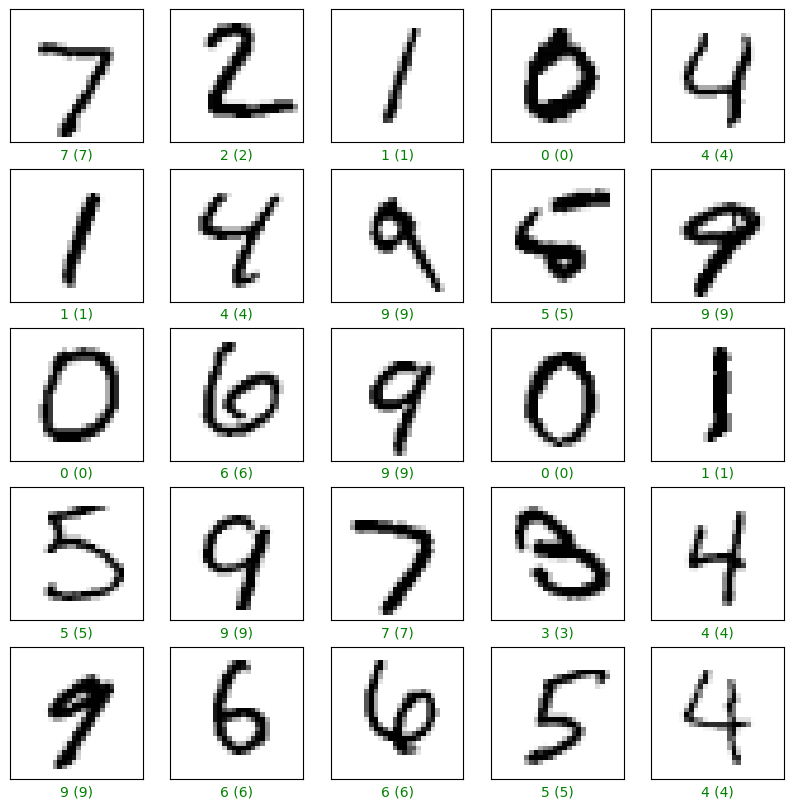

In [29]:
predictions = model.predict(test_images)

plt.figure(figsize = (10, 10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(test_images[i], cmap = plt.cm.binary)

  actual_label = test_labels[i]
  # argmax continues softmax work by getting the highest label probability
  predicted_label = np.argmax(predictions[i])

  color = "green" if predicted_label == actual_label else "red"

  plt.xlabel(f"{predicted_label} ({actual_label})", color = color)

plt.show()